In [1]:
import numpy as np
import matplotlib.pyplot as plt
ages_adult = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", usecols=0, delimiter=", ")

sensitivity = 1
epsilon1 = 0.1
epsilon2 = 0.2
epsilon3 = epsilon1 + epsilon2

# satisfies 0.1-differential privacy
def F1(x):
    return x+np.random.laplace(loc=0, scale=sensitivity/epsilon1)

# satisfies 0.2-differential privacy
def F2(x):
    return x+np.random.laplace(loc=0, scale=sensitivity/epsilon2)

# satisfies 0.3-differential privacy
def F3(x):
    return x+np.random.laplace(loc=0, scale=sensitivity/epsilon3)

# the sequential composition of F1 and F2
def F_seq(x):
    return (F1(x)+F2(x))/2

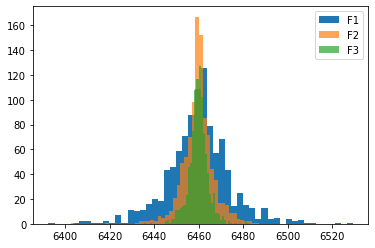

In [2]:
x = len([i for i in ages_adult if i > 50])

# plot F1
plt.hist([F1(x) for i in range(1000)], bins=50, label='F1');

# plot F2 (should look the same)
plt.hist([F2(x) for i in range(1000)], bins=50, alpha=.7, label='F2');

# plot F3 (should look the same)
plt.hist([F3(x) for i in range(1000)], bins=50, alpha=.7, label='F3');

plt.legend();

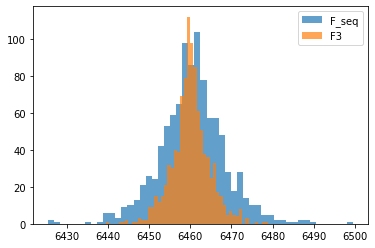

In [3]:
# plot F_seq  
plt.hist([F_seq(x) for i in range(1000)], bins=50, alpha=.7, label='F_seq');

# plot F3 (should look the same)  
plt.hist([F3(x) for i in range(1000)], bins=50, alpha=.7, label='F3');

plt.legend();